<a href="https://colab.research.google.com/github/cshooon/Data_Analysis/blob/main/SupportVectorMachine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports and setup
!pip install matplotlib==3.2.2

%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

pd.set_option('display.precision', 4) # number precision for pandas
pd.set_option('display.max_rows', 12)
pd.set_option('display.max_columns', 12)
pd.set_option('display.float_format', '{:20,.5f}'.format) # get rid of scientific notation

plt.style.use('seaborn-v0_8') # pretty matplotlib plots

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 MB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.2.2-cp310-cp310-linux_x86_64.whl size=12293323 sha256=baeb9cab1173595b08c9980f09845f27c54488e8a25bf7d8a5752f390742a5f8
  Stored in directory: /root/.cache/pip/wheels/bb/81/f3/48b8bd245846ae69fcb2281c84e848bfea1f5260a870c148ae
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mizani 0.8.1 requires matplotlib>=3.5.0, but you have matplotlib 3.2.2 which is incompatible.
plotnine 0.10.1 requires matplot

### 9.6.1 Support Vector Classifier

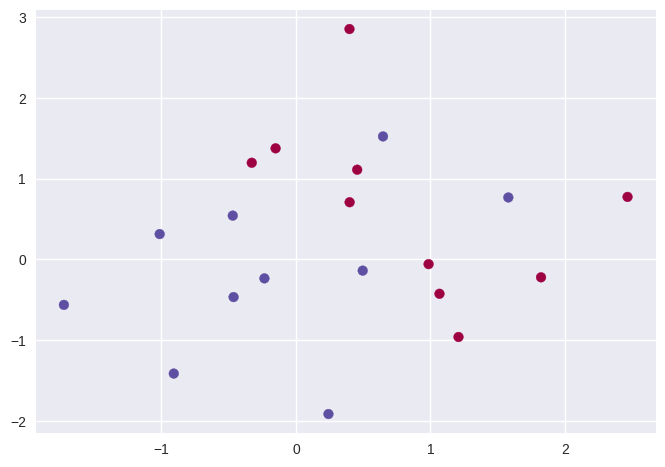

In [ ]:
np.random.seed(42)

X = np.random.normal(size=40).reshape(20, 2)
y = np.concatenate((np.ones(10, dtype=np.int64)*-1, np.ones(10, dtype=np.int64)))
X[y == 1, :] += 1

plt.scatter(X[:, 0], X[:, 1], c=(3-y), cmap='Spectral');

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', C=10)
svc.fit(X, y)

SVC(C=10, kernel='linear')

TypeError: ignored

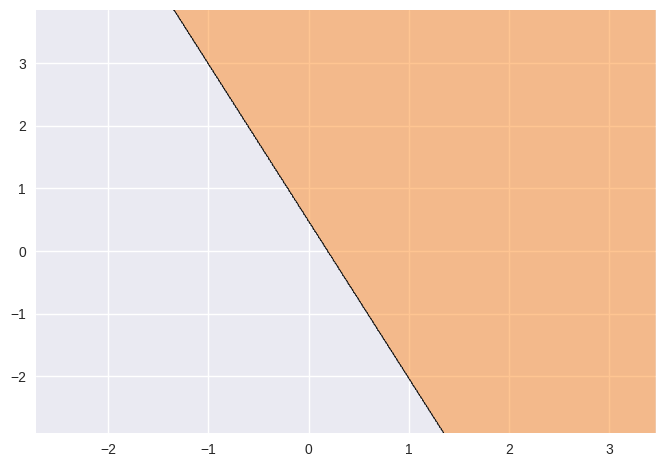

In [ ]:
#using the excellent m1xtend package
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf=svc, X_highlight=svc.support_vectors_);

In [ ]:
# support vectors
pd.DataFrame(svc.support_vectors_, index=svc.support_)

In [ ]:
svc.support_vectors_

In [ ]:
svc.support_

In [ ]:
svc2 = SVC(kernel='linear', C=0.1)
svc2.fit(X, y)

plot_decision_regions(X, y, clf=svc2, X_highlight=svc2.support_vectors_);

In [ ]:
# support vectors
pd.DataFrame(svc2.support_vectors_, index=svc2.support_)

In [ ]:
from sklearn.model_selection import GridSearchCV

svc3 = SVC(kernel='linear')
c_space = np.array([0.001, 0.01, 0.1, 1, 5, 10, 100])
param_grid = {'C': c_space}

tune = GridSearchCV(svc3, param_grid, cv=10)
tune.fit(X, y)

tune.cv_results_
tune.best_params_

In [ ]:
pd.DataFrame(tune.cv_results_)

In [ ]:
from sklearn.utils import resample

np.random.seed(42)
X_test = np.random.normal(size=40).reshape(20,2)
y_test = resample(np.concatenate((np.ones(10, dtype=np.int64)*-1, np.ones(10, dtype=np.int64))),
                  replace=True,
                  n_samples=20, random_state=42)
X_test[y_test == 1, :] += 1

y_pred = tune.predict(X_test)

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(confusion_matrix(y_test, y_pred));

In [ ]:
svc4 = SVC(kernel='linear', C= 0.01)
svc4.fit(X_test, y_test)

y_pred4 = svc4.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, y_pred4));

In [ ]:
X[y == 1, :] += 1.1
plt.scatter(X[:, 0], X[:, 1], c=(y+5)/2, cmap='Spectral');

In [ ]:
svc5 = SVC(kernel='linear', C=1e5)
svc5.fit(X, y)

plot_decision_regions(X, y, clf=svc5, X_highlight=svc5.support_vectors_);

### 9.6.2 Support Vector Machine

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = np.random.normal(size=400).reshape(200, 2)
X[0:100, :] += 2
X[100:150, :] -= 2
y = np.concatenate((np.full(150, 1, dtype=np.int64), np.full(50, 2, dtype=np.int64)))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, test_size=0.5, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Spectral');

In [ ]:
svm = SVC(kernel='rbf', gamma=1, C=1)
svm.fit(X_train, y_train)

plot_decision_regions(X_train, y_train, clf=svm, X_highlight=svm.support_vectors_);

In [ ]:
svm2 = SVC(kernel='rbf', gamma=1, C=1e5)
svm2.fit(X_train, y_train)

plot_decision_regions(X_train, y_train, clf=svm2, X_highlight=svm2.support_vectors_);

In [ ]:
svm3 = SVC(kernel='rbf')
c_space = np.array([0.1, 1, 10, 100, 1000])
g_space = np.array([0.5, 1, 2, 3, 4])
param_grid = {'C': c_space, 'gamma': g_space}

tune = GridSearchCV(svm3, param_grid, cv=10)
tune.fit(X_train, y_train)

tune.cv_results_
tune.best_params_

In [ ]:
y_pred = tune.predict(X_test)

# plot_confusion_matrix(confusion_matrix(y_test, y_pred));
# let's try another pretty confusion matrix implementation;
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test, y_pred);

### 9.6.3 ROC Curves

In [ ]:
svm4 = SVC(kernel='rbf', gamma=2, C=1, probability=True)
svm4.fit(X_train, y_train)

svm5 = SVC(kernel='rbf', gamma=50, C=1, probability=True)
svm5.fit(X_train, y_train)

y_probas4 = svm4.predict_proba(X_train)
y_probas5 = svm5.predict_proba(X_train)

In [ ]:
f, axes = plt.subplots(1, 2, sharex=False, sharey=False)
f.set_figheight(6)
f.set_figwidth(15)

skplt.metrics.plot_roc_curve(y_train, y_probas4, curves=['each_class'], ax=axes[0])
skplt.metrics.plot_roc_curve(y_train, y_probas5, curves=['each_class'], ax=axes[1]);

### 9.6.4 SVM with Multiple Classes

In [ ]:
np.random.seed(42)

X = np.random.normal(size=400).reshape(200,2)
X[0:100, :] += 2
X[100:150, :] -= 2
y = np.concatenate((np.full(150, 1, dtype=np.int64), np.full(50, 2, dtype=np.int64)))

X = np.concatenate((X, np.random.normal(size=100).reshape(50, 2)))
y = np.concatenate((y, np.full(50, 0, dtype=np.int64)))

X[y == 0, 1] += 2

plt.scatter(X[:, 0], X[:, 1], c=y+1, cmap='Spectral');

In [ ]:
svm_m = SVC(kernel='rbf', C=10, gamma=1)
svm_m.fit(X, y)

plot_decision_regions(X, y, clf=svm_m, X_highlight=svm_m.support_vectors_);
